1. Скачасть информацию о себе из ВК. Сохранить в JSON.

In [68]:
import requests
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
fields = ["photo_id", "verified", "sex", "bdate", "city", "country", "home_town", 
          "has_photo", "photo_50", "photo_100", "photo_200_orig", "photo_200", 
          "photo_400_orig", "photo_max", "photo_max_orig", "online", "domain", 
          "has_mobile", "contacts", "site", "education", "universities", "schools", 
          "status", "last_seen", "followers_count", "common_count", "occupation", 
          "nickname", "relatives", "relation", "personal", "connections", "exports", 
          "activities", "interests", "music", "movies", "tv", "books", "games", "about", 
          "quotes", "can_post", "can_see_all_posts", "can_see_audio", "can_write_private_message", 
          "can_send_friend_request", "is_favorite", "is_hidden_from_feed", "timezone", 
          "screen_name", "maiden_name", "crop_photo", "is_friend", "friend_status", "career", 
          "military", "blacklisted", "blacklisted_by_me", "can_be_invited_group"]

pars = {"v": "5.103",
        "access_token": "442309d9b8072c4ac1302525d77aabf853e16b52103030a93aa8fb5b6c393346d0a106680dd4524a886e7",
        "user_ids": "504731811",
        "fields": ",".join(fields)}
resp = requests.get('https://api.vk.com/method/users.get', params=pars)
info = json.loads(resp.text)["response"][0]
info

{'id': 504731811,
 'first_name': 'Ваня',
 'last_name': 'Морозов',
 'is_closed': False,
 'can_access_closed': True,
 'sex': 2,
 'nickname': '',
 'domain': 'bluegene',
 'screen_name': 'bluegene',
 'bdate': '3.12.1991',
 'timezone': 3,
 'photo_50': 'https://sun2-4.userapi.com/c849232/v849232507/1afd8a/KTmr6QEezBQ.jpg?ava=1',
 'photo_100': 'https://sun2-4.userapi.com/c849232/v849232507/1afd89/m72A8jz2kxo.jpg?ava=1',
 'photo_200': 'https://sun2-3.userapi.com/c849232/v849232507/1afd88/7zlsogDx7dI.jpg?ava=1',
 'photo_200_orig': 'https://sun2-3.userapi.com/impf/c849232/v849232507/1afd87/wKNCZSfryEg.jpg?size=200x0&quality=90&sign=b452597297a2925edf205607532d48db&c_uniq_tag=39x9_tvjhsX-jslobInLVKKwmaGUV--L2cAPY75gLU4&ava=1',
 'photo_max': 'https://sun2-3.userapi.com/c849232/v849232507/1afd88/7zlsogDx7dI.jpg?ava=1',
 'photo_400_orig': 'https://sun2-3.userapi.com/impf/c849232/v849232507/1afd87/wKNCZSfryEg.jpg?size=400x0&quality=90&sign=78b84326dcf9432010c1167a39134d28&c_uniq_tag=Olc0ROUDL-DiQ-Um5P

2. Скачать профили своих друзей в ВК с полями sex, age, followers_count. Сохранить на диск в виде JSON файла.

In [20]:
pars = {"v": "5.103",
        "access_token": "442309d9b8072c4ac1302525d77aabf853e16b52103030a93aa8fb5b6c393346d0a106680dd4524a886e7",
        "user_id": "504731811",
        "fields": "sex,age,followers_count"}
resp = requests.get('https://api.vk.com/method/friends.get', params=pars)
friends = json.loads(resp.text)["response"]
print("friends count:", friends["count"])

friends count: 153


In [21]:
# посмотрим первые 5 френдов
friends["items"][:5]

[{'id': 6998,
  'first_name': 'Ирина',
  'last_name': 'Лесовская',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'followers_count': 176,
  'online': 0,
  'track_code': '35a6011e771FjbQD5awm_igLAzaPwGSkygJwySICFy76ryvpLQOC1kvuhlDq9nieRdjuywOzdsI'},
 {'id': 34546,
  'first_name': 'Алексей',
  'last_name': 'Устинов',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'followers_count': 37,
  'online': 0,
  'track_code': '1413c359qrOfbtqfOYv6BS4PUyFgEPl7_iwcuYvEThzvtQawiOfH2JUI5pk53fZRKdCtxeJ0mR2M'},
 {'id': 38384,
  'first_name': 'Даниил',
  'last_name': 'Мусатов',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'followers_count': 258,
  'online': 0,
  'track_code': 'fa6077a1D9fxIHkRh2n_beqsVgI8pw_xFSAI6q3c8jddDkYC-sxivPlBGhCLaaJh7nOo5r7Db5dn'},
 {'id': 43221,
  'first_name': 'Федор',
  'last_name': 'Петров',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'followers_count': 251,
  'online': 0,
  'track_code': '8507e367LZ0

In [22]:
#сохраним
with open('friends.json', 'w', encoding='utf-8') as f:
    json.dump(friends, f, ensure_ascii=False, indent=4)

3. Создать DataFrame, столбцы в котором - Имя, фамилия, пол, возраст и число подписчиков, а каждая строка соответствует одному другу из скачаных в задании 1. Индекс должен содержать id пользователей.

In [41]:
import pandas as pd

friends_df = pd.DataFrame(friends["items"]).set_index("id")\
    .drop(["is_closed", "can_access_closed", "online", "track_code", "deactivated"], axis=1)
friends_df.head()

,first_name,last_name,sex,followers_count
id,,,,
6998,Ирина,Лесовская,1,176.0
34546,Алексей,Устинов,2,37.0
38384,Даниил,Мусатов,2,258.0
43221,Федор,Петров,2,251.0
59368,Владислав,Франк,2,334.0


4*. Скачать необходимые данные и построить граф своих друзей (эго-сеть). Сохранить в любом виде (матрица смежности, ассоциативный массив смежности, матрица инцедентности, таблица рёбер и т. д.)

In [109]:
def get_friends(user_id):
    pars = {"v": "5.103",
        "access_token": "442309d9b8072c4ac1302525d77aabf853e16b52103030a93aa8fb5b6c393346d0a106680dd4524a886e7",
        "user_id": str(user_id),
        "fields": "sex,age,followers_count"}
    resp = requests.get('https://api.vk.com/method/friends.get', params=pars)
    try:
        friends = json.loads(resp.text)["response"]
        return set(fr["id"] for fr in friends["items"])
    except:
        #print(resp.text)
        return set()

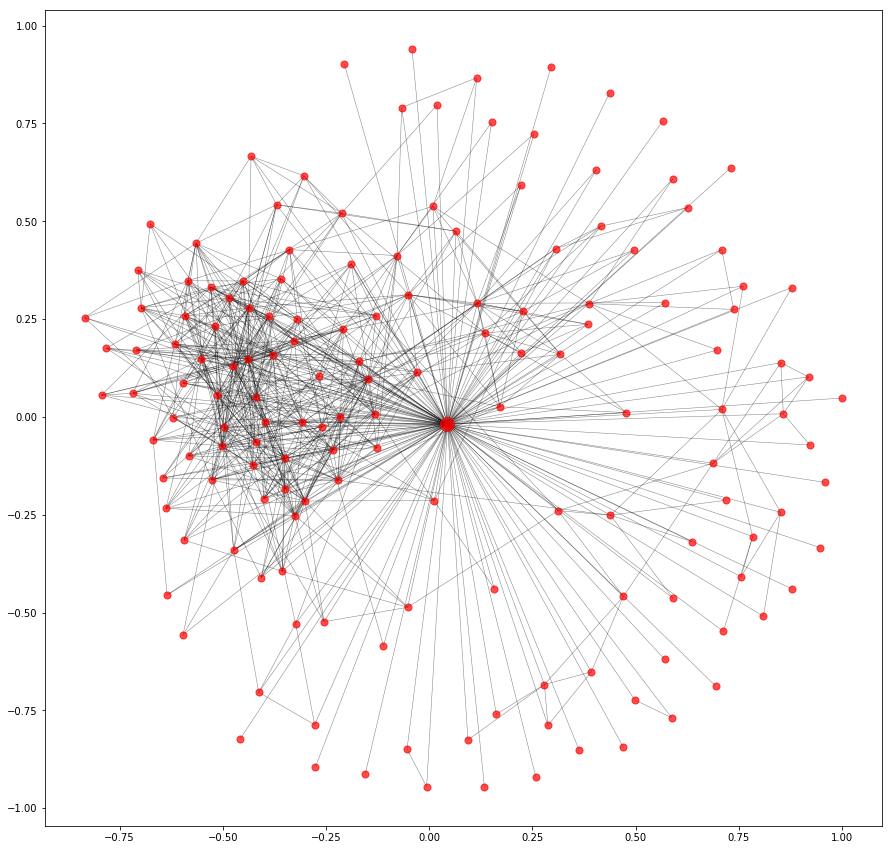

In [110]:
import time
import networkx as nx
from tqdm.notebook import tqdm

my_id = "504731811"
my_friends = get_friends(my_id)

g = nx.Graph()
g.add_node(my_id)

for fr in my_friends: # мои друзья
    g.add_node(str(fr))
    g.add_edge(str(fr), my_id)
    
between_friends = {}
for fr in tqdm(list(my_friends)): # тут качаю и строю связи между моими друзьями
    for mutual in (get_friends(fr) & my_friends):
        g.add_edge(str(fr), str(mutual))
    time.sleep(3)
    
plt.figure(1, figsize=(15, 15))

pos = nx.spring_layout(g) #nx.drawing.nx_pylab.draw_kamada_kawai(g)
nx.draw_networkx_nodes(g, pos, node_color='r', node_size=50, alpha=0.7)
nx.draw_networkx_nodes(g, pos, nodelist=[my_id], node_color='r', node_size=200, alpha=0.7)
nx.draw_networkx_edges(g, pos, width=0.5, alpha=0.5, edge_color='k')

In [111]:
nx.write_gml(g, "my_ego.gml.gz")